In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Cargar data

In [2]:
data = np.load('data/proyecto_training_data.npy')

In [3]:
data[1]

array([1.815e+05, 6.000e+00, 1.262e+03, 6.000e+00, 1.976e+03, 8.000e+01])

## Separar data
Separar datos en un set de entrenamiento y un set para validación y pruebas.

In [4]:
entrenamiento_len = int(len(data) * 0.8)

In [5]:
np.random.seed(123)
sel = np.random.choice(data.shape[0], size=entrenamiento_len, replace=False)

In [6]:
entrenamiento = pd.DataFrame(data[sel], columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

In [7]:
unsel = list(set(range(data.shape[0])) - set(sel))

In [8]:
validacion = pd.DataFrame(data[unsel], columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

## Análisis exploratorio

Estadísticas descriptivas

In [9]:
entrenamiento.describe(include='all')

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,954.000000
mean,180982.180651,6.092466,1154.730308,6.521404,1971.722603,69.872117
std,79320.195000,1.366139,372.087529,1.614911,30.256092,23.374464
min,35311.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130000.000000,5.000000,879.750000,5.000000,1954.000000,59.000000
50%,164800.000000,6.000000,1082.000000,6.000000,1973.500000,69.000000
75%,213492.500000,7.000000,1383.000000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,3138.000000,12.000000,2010.000000,313.000000


Rango peak-to-peak

In [10]:
entrenamiento.max() - entrenamiento.min()

SalePrice       719689.0
OverallQual          9.0
1stFlrSF          2804.0
TotRmsAbvGrd        10.0
YearBuilt          138.0
LotFrontage        292.0
dtype: float64

Histogramas

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

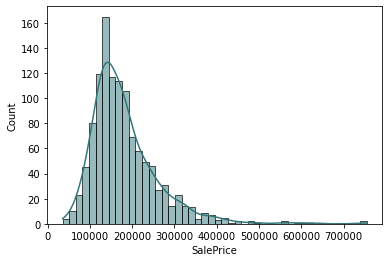

In [11]:
sns.histplot(data = entrenamiento, x = "SalePrice", kde = True, color = "#33777b")

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

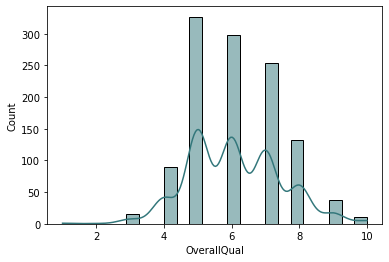

In [12]:
sns.histplot(data = entrenamiento, x = "OverallQual", kde = True, color = "#33777b")

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

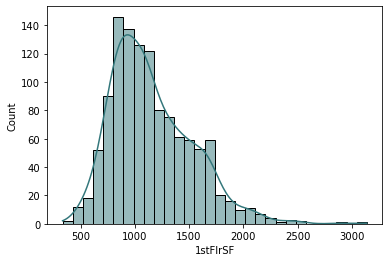

In [13]:
sns.histplot(data = entrenamiento, x = "1stFlrSF", kde = True, color = "#33777b")

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

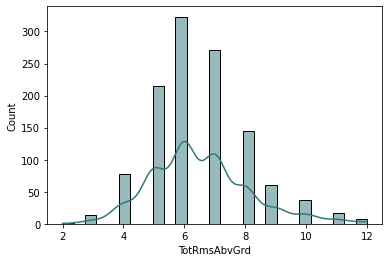

In [15]:
sns.histplot(data = entrenamiento, x = "TotRmsAbvGrd", kde = True, color = "#33777b")

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

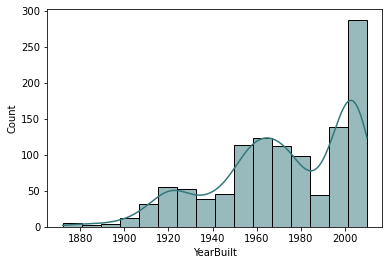

In [16]:
sns.histplot(data = entrenamiento, x = "YearBuilt", kde = True, color = "#33777b")

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

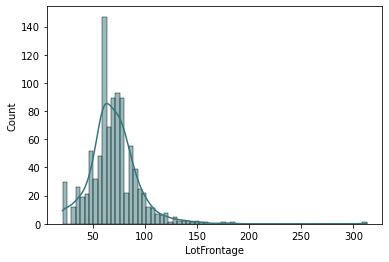

In [17]:
sns.histplot(data = entrenamiento, x = "LotFrontage", kde = True, color = "#33777b")

Coeficientes de correlación

In [18]:
coeficientes_corr = entrenamiento.corr( ).iloc[0:1, 1:]
coeficientes_corr

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,0.787319,0.616271,0.538411,0.525589,0.372628


Scatterplots

In [19]:
#coeficientes_corr.OverallQual
round(float(coeficientes_corr['OverallQual']), 3)
# make a function?

0.787

Text(0, 0.5, 'Precio de venta')

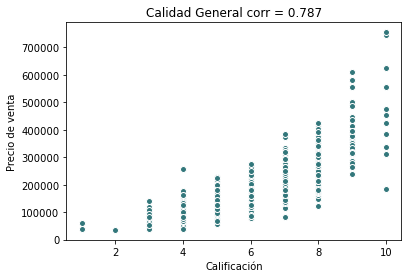

In [20]:
OverallQual_corr = round(float(coeficientes_corr['OverallQual']), 3)
plt.scatter(x = entrenamiento['OverallQual'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Calidad General corr = {corr}'.format(corr = OverallQual_corr))
plt.xlabel('Calificación')
plt.ylabel('Precio de venta')

Text(0, 0.5, 'Precio de venta')

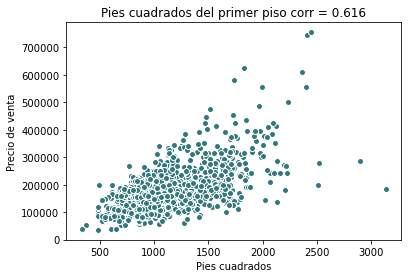

In [22]:
FirtFlr_corr = round(float(coeficientes_corr['1stFlrSF']), 3)
plt.scatter(x = entrenamiento['1stFlrSF'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Pies cuadrados del primer piso corr = {corr}'.format(corr = FirtFlr_corr))
plt.xlabel('Pies cuadrados')
plt.ylabel('Precio de venta')

Text(0, 0.5, 'Precio de venta')

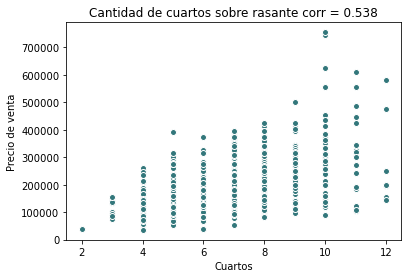

In [23]:
TotRms_corr = round(float(coeficientes_corr['TotRmsAbvGrd']), 3)
plt.scatter(x = entrenamiento['TotRmsAbvGrd'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Cantidad de cuartos sobre rasante corr = {corr}'.format(corr = TotRms_corr))
plt.xlabel('Cuartos')
plt.ylabel('Precio de venta')

Text(0, 0.5, 'Precio de venta')

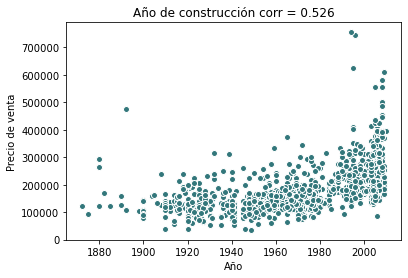

In [25]:
YearBuilt_corr = round(float(coeficientes_corr['YearBuilt']), 3)
plt.scatter(x = entrenamiento['YearBuilt'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Año de construcción corr = {corr}'.format(corr = YearBuilt_corr))
plt.xlabel('Año')
plt.ylabel('Precio de venta')

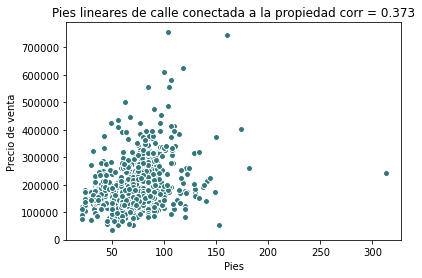

In [26]:
Lot_corr = round(float(coeficientes_corr['LotFrontage']), 3)
plt.scatter(x = entrenamiento['LotFrontage'], y = entrenamiento['SalePrice'], color = "#33777b", edgecolors="white")
plt.title('Pies lineares de calle conectada a la propiedad corr = {corr}'.format(corr = Lot_corr))
plt.xlabel('Pies')
plt.ylabel('Precio de venta')
plt.show()

Seleccionar 2 variables con más potencial predictivo:
Overall Quality
First floor square feet

## Funciones para entrenamiento de modelo iterativo

In [14]:
def error_promedio(y_hat, y):
    return np.mean(0.5 * (y_hat - y)**2)

In [21]:
def regresion_lineal_manual(x, y, epochs=3, imprimir_error_cada=1, lr=0.01 ):
    x_mat = np.hstack((x.reshape((-1, 1)), np.ones((x.shape[0], 1))))

    # inicializar parametros y numero de iteraciones
    m = 0
    b = 0
    parametros = [m, b]
    iteracion = 0
    errores = []
    modelo = {}

    for i in range(epochs):
        iteracion += 1
        # prediccion de y (SalesPrice)
        y_hat = np.dot(x_mat, parametros)
        
        # calcular error promedio
        error = error_promedio(y_hat, y)
        errores.append(error)
        
        if (iteracion % imprimir_error_cada == 0):
            print("iteracion", iteracion, "error promedio", error)
        gradientes = np.mean(np.multiply(x_mat, (y_hat - y).reshape((-1, 1))), axis=0)
         # actualizar parametros
        modelo[iteracion] = (parametros[0] - lr * gradientes[0], parametros[1] - lr * gradientes[1])
        parametros[0] = parametros[0] - lr * gradientes[0]
        parametros[1] = parametros[1] - lr * gradientes[1]

    resultados = {"modelo": modelo, "error_promedio": errores}
    return (resultados)

In [24]:
def graficar_error(vector_errores):
    x = np.arange(start=1, stop=len(vector_errores)+1, step=1)
    
    sns.lineplot(x = x, y = vector_errores)

In [27]:
def graficar_modelo(x, y, datos_modelo, n):
    plt.scatter(x, y, color='#33777b', edgecolors="white")

    for i in range(n, len(datos_modelo)+1, n):
        plt.plot(x, x * datos_modelo[i][0] + datos_modelo[i][1])

    plt.show()

## Entrenando modelo iterativo

### Overall Quality

In [28]:
overall_qual = entrenamiento['OverallQual'].values
sale_price = entrenamiento['SalePrice'].values

In [29]:
modelo_manual_overall_qual = regresion_lineal_manual(overall_qual, sale_price, epochs=30, imprimir_error_cada=5, lr=0.004)

iteracion 5 error promedio 5935616249.459554
iteracion 10 error promedio 2231617124.5152626
iteracion 15 error promedio 1581428974.6607733
iteracion 20 error promedio 1466982158.2771251
iteracion 25 error promedio 1446523009.5506516
iteracion 30 error promedio 1442553154.0138984


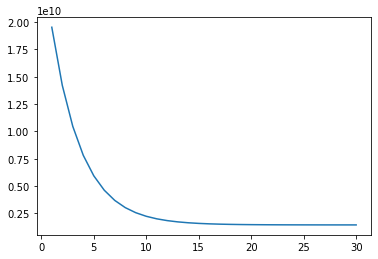

In [30]:
graficar_error(modelo_manual_overall_qual["error_promedio"])

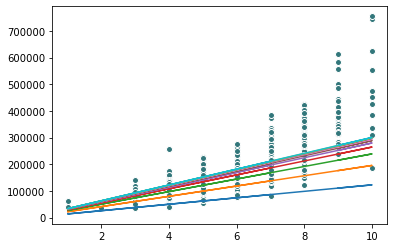

In [31]:
graficar_modelo(overall_qual, sale_price, modelo_manual_overall_qual['modelo'], n=3)

### 1st Floor Square Feet

In [32]:
first_floor = entrenamiento['1stFlrSF'].values

In [33]:
modelo_manual_first_floor = regresion_lineal_manual(first_floor, sale_price, epochs=10, imprimir_error_cada=2, lr=0.000001)

iteracion 2 error promedio 5890863696.382211
iteracion 4 error promedio 2182895390.5711217
iteracion 6 error promedio 1999274015.7787993
iteracion 8 error promedio 1990180933.7340999
iteracion 10 error promedio 1989730623.120705


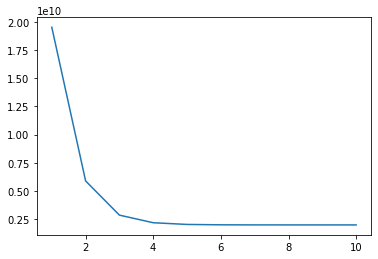

In [34]:
graficar_error(modelo_manual_first_floor["error_promedio"])

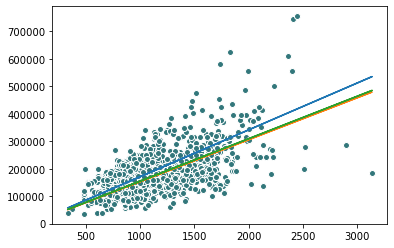

In [35]:
graficar_modelo(first_floor, sale_price, modelo_manual_first_floor['modelo'], n=3)

## Entrenando un modelo con Scikit-learn


### Overall Quality

In [36]:
modelo_skt_overall_qual = LinearRegression().fit(overall_qual.reshape((-1, 1)), sale_price)


In [37]:
print('m:', modelo_skt_overall_qual.coef_)
print('b:', modelo_skt_overall_qual.intercept_)

m: [45712.9661546]
b: -97522.50013365247


### 1st Floor Square Feet

In [38]:
modelo_skt_first_floor = LinearRegression().fit(first_floor.reshape((-1, 1)), sale_price)

In [39]:
print('m:', modelo_skt_first_floor.coef_)
print('b:', modelo_skt_first_floor.intercept_)

m: [131.37424297]
b: 29280.360574538732


## Predicción de Modelos

In [40]:
def prediccion_modelos(x, modelo_manual, modelo_skt):
    ultimos_parametros_manuales = list(modelo_manual)[-1]
    prediccion_manual = x * modelo_manual[ultimos_parametros_manuales][0] + modelo_manual[ultimos_parametros_manuales][1]
    
    prediccion_skt = modelo_skt.predict(x.reshape((-1, 1)))

    prediccion_promedio = np.mean( np.array([prediccion_manual, prediccion_skt]), axis=0 )

    predicciones = {
        'modelo_manual':prediccion_manual,
        'modelo_skt':prediccion_skt,
        'combinacion':prediccion_promedio,
    }
    return predicciones

In [41]:
sale_price_validacion = validacion['SalePrice'].values

### Overall Quality

In [42]:
predicciones_overall_qual = prediccion_modelos(
    validacion['OverallQual'].values,
    modelo_manual_overall_qual['modelo'],
    modelo_skt_overall_qual
)

### First Floor Square Feet

In [43]:
predicciones_first_floor = prediccion_modelos(
    validacion['1stFlrSF'].values,
    modelo_manual_first_floor['modelo'],
    modelo_skt_first_floor
)

In [44]:
errores_modelo = pd.DataFrame({
  'variable_independiente': [
    "Overall Quality", 
  "Overall Quality", 
  "Overall Quality", 
  "1st Floor SF", 
  "1st Floor SF", 
  "1st Floor SF"
  ], 
  'modelo': [
    "Modelo Manual", 
    "Modelo Scikit",
    "Modelo combinado",
    "Modelo Manual", 
    "Modelo Scikit",
    "Modelo combinado"
    ],
    "error_promedio": [
      error_promedio(predicciones_overall_qual['modelo_manual'], sale_price_validacion),
      error_promedio(predicciones_overall_qual['modelo_skt'],sale_price_validacion),
      error_promedio(predicciones_overall_qual['combinacion'], sale_price_validacion),
      error_promedio(predicciones_first_floor['modelo_manual'], sale_price_validacion),
      error_promedio(predicciones_first_floor['modelo_skt'],sale_price_validacion), 
      error_promedio(predicciones_first_floor['combinacion'], sale_price_validacion) 
    ]
  })

<AxesSubplot:xlabel='variable_independiente', ylabel='error_promedio'>

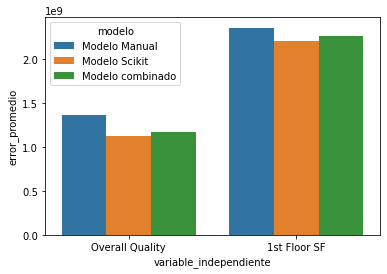

In [45]:
sns.barplot(data = errores_modelo, x = "variable_independiente", y = "error_promedio", hue = "modelo") 

## Referencias

https://realpython.com/linear-regression-in-python/

https://www.kite.com/python/answers/how-to-convert-a-column-in-a-pandas-dataframe-to-a-numpy-array-in-python

http://seaborn.pydata.org/generated/seaborn.barplot.html

https://stackoverflow.com/questions/26355313/plotting-multiple-plots-generated-inside-a-for-loop-on-the-same-axes-python

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
